<a href="https://colab.research.google.com/github/anko191/Python_Kaggle/blob/master/pandas/pandas_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping
* pip install pandas-datareader
* pip install git+https://github.com/pydata/pandas-datareader.git


In [ ]:
import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

with open('./alpha_vantage_api_key.txt') as f:
    api_key = f.read()
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2019,12,31)
df_sne = web.DataReader('SNE', 'av-daily', start, end, api_key = api_key)
print(df_sne)
# ソニー SNE, 

             open    high    low  close   volume
2015-01-02  20.47  20.685  20.43  20.56  1229939
2015-01-05  20.45  20.450  20.21  20.26  1083137
2015-01-06  20.46  20.580  20.15  20.25  2209124
2015-01-07  21.59  21.700  21.47  21.53  2486293
2015-01-08  21.53  21.620  21.47  21.56  1296471
...           ...     ...    ...    ...      ...
2019-12-24  67.98  68.000  67.76  67.76   264463
2019-12-26  68.00  68.030  67.85  68.02   517975
2019-12-27  68.03  68.100  67.73  67.78   351118
2019-12-30  67.78  67.790  67.25  67.72   993865
2019-12-31  67.72  68.025  67.51  68.00   549672

[1258 rows x 5 columns]


In [ ]:
df_aapl = web.DataReader('AAPL', 'av-daily', start, end, api_key = api_key)
print(df_aapl)
df_sne_aapl = pd.DataFrame({'SNE':df_sne['close'], 'AAPL':df_aapl['close']})
print(df_sne_aapl)

              open    high       low   close    volume
2015-01-02  111.39  111.44  107.3500  109.33  53204626
2015-01-05  108.29  108.65  105.4100  106.25  64285491
2015-01-06  106.54  107.43  104.6300  106.26  65797116
2015-01-07  107.20  108.20  106.6950  107.75  40105934
2015-01-08  109.23  112.15  108.7000  111.89  59364547
...            ...     ...       ...     ...       ...
2019-12-24  284.69  284.89  282.9197  284.27  12119714
2019-12-26  284.82  289.98  284.7000  289.91  23334004
2019-12-27  291.12  293.97  288.1200  289.80  36592936
2019-12-30  289.46  292.69  285.2200  291.52  36059614
2019-12-31  289.93  293.68  289.5200  293.65  25247625

[1258 rows x 5 columns]
              SNE    AAPL
2015-01-02  20.56  109.33
2015-01-05  20.26  106.25
2015-01-06  20.25  106.26
2015-01-07  21.53  107.75
2015-01-08  21.56  111.89
...           ...     ...
2019-12-24  67.76  284.27
2019-12-26  68.02  289.91
2019-12-27  67.78  289.80
2019-12-30  67.72  291.52
2019-12-31  68.00  293.65

[1

In [ ]:
df_sne.to_csv('./sne_2015_2019.csv')
df_aapl.to_csv('./aapl_2015_2019.csv')
df_sne_aapl.to_csv('./sne_aapl_2015_2019.csv')

## plot graph
pandas.DataFrame.plot() method

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


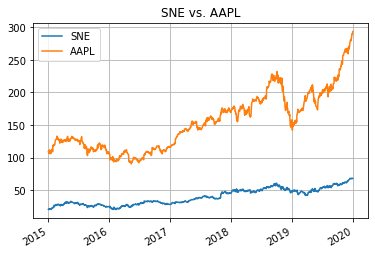

In [ ]:
print(type(df_sne_aapl.index))
df_sne_aapl.index = pd.to_datetime(df_sne_aapl.index)
print(type(df_sne_aapl.index))
df_sne_aapl.plot(title='SNE vs. AAPL', grid = True)
plt.show()
plt.savefig('./na.png')
plt.close()

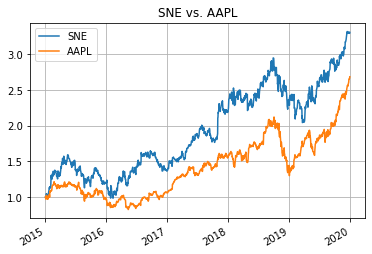

In [ ]:
df_sne_aapl['SNE'] /= df_sne_aapl['SNE'][0]
df_sne_aapl['AAPL'] /= df_sne_aapl['AAPL'][0]

df_sne_aapl.plot(title = 'SNE vs. AAPL', grid = True)
plt.show()
plt.savefig('./a.png')
plt.close()

# Data Acquisition

In [ ]:
from pandas_datareader import wb
import matplotlib.pyplot as plt
df = wb.download(indicator = 'SP.POP.TOTL', country=['JP', 'US'], start = 1960, end = 2014)
print(df)

                    SP.POP.TOTL
country       year             
Japan         2014    127276000
              2013    127445000
              2012    127629000
              2011    127833000
              2010    128070000
...                         ...
United States 1964    191889000
              1963    189242000
              1962    186538000
              1961    183691000
              1960    180671000

[110 rows x 1 columns]


In [ ]:
df2 = df.unstack(level = 0)
print(df2.head())
print(df2.tail())

        SP.POP.TOTL              
country       Japan United States
year                             
1960       92500572     180671000
1961       94943000     183691000
1962       95832000     186538000
1963       96812000     189242000
1964       97826000     191889000
        SP.POP.TOTL              
country       Japan United States
year                             
2010      128070000     309321666
2011      127833000     311556874
2012      127629000     313830990
2013      127445000     315993715
2014      127276000     318301008


In [ ]:
print(df2.columns)
df2.columns = ['Japan', 'United States']
print(df2.head())

MultiIndex([('SP.POP.TOTL',         'Japan'),
            ('SP.POP.TOTL', 'United States')],
           names=[None, 'country'])
         Japan  United States
year                         
1960  92500572      180671000
1961  94943000      183691000
1962  95832000      186538000
1963  96812000      189242000
1964  97826000      191889000


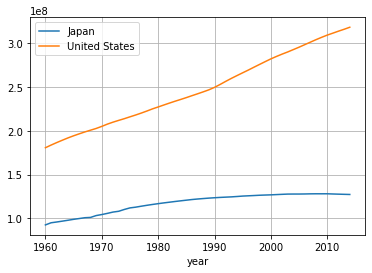

In [ ]:
df2.plot(grid=True)
plt.show()

# using BeautifulSoup

In [ ]:
import pandas as pd
url = 'https://info.finance.yahoo.co.jp/ranking/?kd=4'
dfs = pd.read_html(url)
print(len(dfs))

1


In [ ]:
print(dfs[0].head())

  順位   コード    市場             名称    取引値   取引値.1     発行済み株式数 時価総額（百万円） 単元株数  掲示板
0  1  7203  東証1部      トヨタ自動車(株)  07/17    6813  3262997492  22230802  100  掲示板
1  2  9984  東証1部  ソフトバンクグループ(株)  07/17    6415  2089814330  13406159  100  掲示板
2  3  6861  東証1部       (株)キーエンス  07/17   44100   243207684  10725459  100  掲示板
3  4  6758  東証1部         ソニー(株)  07/17    8115  1261058781  10233492  100  掲示板
4  5  9432  東証1部      日本電信電話(株)  07/17  2558.5  3900788940   9980169  100  掲示板


## but error

In [ ]:
dfs[0].columns = ['順位', 'コード', '市場', '名称', '時刻', '取引値', '発行済み株式数', '時価総額（百万円）', '単元株数', '掲示板']
print(dfs[0][['名称', '時価総額（百万円）']].head())

              名称 時価総額（百万円）
0      トヨタ自動車(株)  22230802
1  ソフトバンクグループ(株)  13406159
2       (株)キーエンス  10725459
3         ソニー(株)  10233492
4      日本電信電話(株)   9980169


In [ ]:
url = 'https://ja.wikipedia.org/wiki/Python'
dfs = pd.read_html(url)
print(len(dfs))


13


In [ ]:
dfs = pd.read_html(url, match = 'リリース日')
print(len(dfs))
print(dfs[0])
print(dfs[1])

2
   バージョン    リリース日[29]   サポート期限[30]
0    2.0  2000年10月16日          NaN
1    2.1   2001年4月15日          NaN
2    2.2  2001年12月21日          NaN
3    2.3   2003年7月29日          NaN
4    2.4  2004年11月30日          NaN
5    2.5   2006年9月19日          NaN
6    2.6   2008年10月1日  2013年10月29日
7    2.7    2010年7月4日    2020年1月1日
   バージョン    リリース日[29]  サポート期限[30]
0    3.0   2008年12月3日  2009年1月13日
1    3.1   2009年6月27日   2012年4月9日
2    3.2   2011年2月20日  2016年2月20日
3    3.3   2012年9月29日  2017年9月29日
4    3.4   2014年3月16日  2019年3月18日
5    3.5   2015年9月13日     2020年9月
6    3.6  2016年12月23日    2021年12月
7    3.7   2018年6月27日     2023年6月
8    3.8  2019年10月14日    2024年10月


In [ ]:
dfs = pd.read_html(url, match='リリース日', header=0)

print(len(dfs))

print(dfs[0])

print(dfs[1])

2
   バージョン    リリース日[29]   サポート期限[30]
0    2.0  2000年10月16日          NaN
1    2.1   2001年4月15日          NaN
2    2.2  2001年12月21日          NaN
3    2.3   2003年7月29日          NaN
4    2.4  2004年11月30日          NaN
5    2.5   2006年9月19日          NaN
6    2.6   2008年10月1日  2013年10月29日
7    2.7    2010年7月4日    2020年1月1日
   バージョン    リリース日[29]  サポート期限[30]
0    3.0   2008年12月3日  2009年1月13日
1    3.1   2009年6月27日   2012年4月9日
2    3.2   2011年2月20日  2016年2月20日
3    3.3   2012年9月29日  2017年9月29日
4    3.4   2014年3月16日  2019年3月18日
5    3.5   2015年9月13日     2020年9月
6    3.6  2016年12月23日    2021年12月
7    3.7   2018年6月27日     2023年6月
8    3.8  2019年10月14日    2024年10月


In [82]:
df = pd.concat([dfs[0], dfs[1]], ignore_index = True).sort_values('リリース日[29]')
print(df)

    バージョン    リリース日[29]   サポート期限[30]
0     2.0  2000年10月16日          NaN
2     2.2  2001年12月21日          NaN
1     2.1   2001年4月15日          NaN
3     2.3   2003年7月29日          NaN
4     2.4  2004年11月30日          NaN
5     2.5   2006年9月19日          NaN
6     2.6   2008年10月1日  2013年10月29日
8     3.0   2008年12月3日   2009年1月13日
9     3.1   2009年6月27日    2012年4月9日
7     2.7    2010年7月4日    2020年1月1日
10    3.2   2011年2月20日   2016年2月20日
11    3.3   2012年9月29日   2017年9月29日
12    3.4   2014年3月16日   2019年3月18日
13    3.5   2015年9月13日      2020年9月
14    3.6  2016年12月23日     2021年12月
15    3.7   2018年6月27日      2023年6月
16    3.8  2019年10月14日     2024年10月


In [83]:
df.to_csv('./pandas_read_sample.csv')